In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', 5000)

In [3]:
#returns the player using player and match id
def get_player(playerid, matchId):
    path='data/events/'+str(matchId)+'.json'
    with open(path, 'r', encoding='utf-8') as f:
        rd = f.read()
    rd=rd[28:-2]
    obj = json.loads(rd)
    dfw = pd.json_normalize(obj)
    dfw=dfw[dfw['player.id']==playerid]
    return dfw['player.name'].iloc[0], dfw['team.name'].iloc[0]  ,dfw['matchId'].iloc[0]

In [217]:
def bestplayers(df,name):
    for i in range (50):
        id=df['playerId'].iloc[i]
        matchid=df['matchId'].iloc[i]
        player, team, match=get_player(id,matchid)
        x = "{:.2f}".format(df[name].iloc[i])
        print('&',player, '&', team,'&', match, '&', x, '\\\\')
        #  

In [669]:
test=pd.read_csv('ranking/finalv2/ranking_mi_scaled.csv')

In [670]:
test=test[['playerId', 'scaled_offensive', 'scaled_off_playmaker', 'scaled_defensive', 'scaled_def_playmaker']]

In [671]:
test.to_csv('mi_perfmormances.csv', index=False)

In [650]:
#function to print the top players of a ranking
def printtop(df, sort, name):
    count=df['playerId'].value_counts()
    players_with_at_least_5_performances = count[count >= 5].index
    filtered_data = df[df['playerId'].isin(players_with_at_least_5_performances)]
    average_ratings = filtered_data.groupby('playerId')[['scaled_offensive', 'scaled_defensive', 'scaled_runner']].mean().reset_index()
    average_ratings=average_ratings.sort_values(by=sort, ascending=False)
    average_ratings.to_csv(name, index=False)
    for i in range (10):
        pid=average_ratings['playerId'].iloc[i]
        r=average_ratings[sort].iloc[i]
        temp=df[df['playerId']==pid].iloc[0]
        mid=temp['matchId']
        print(get_player(pid,mid),r)


In [653]:
printtop(test, 'scaled_defensive', 'avg_fb_ratings.csv')

('João Cancelo', 'Portugal', 2799535) 77.92728615026196
('B. Pavard', 'France', 2799975) 77.57541361287741
('Dani Carvajal', 'Spain', 2799908) 77.17421122643164
('U. Meraş', 'Turkey', 2799988) 73.83083627581797
('M. Wöber', 'Austria', 2799931) 71.08631736348777
('F. Kudryashov', 'Russia', 2800008) 70.67317882834918
('T. Hume', 'Northern Ireland', 5414155) 70.12464649958639
('G. Di Lorenzo', 'Italy', 2800064) 69.7895918199934
('N. Bancu', 'Romania', 2799891) 69.7427876075793
('V. Pálsson', 'Iceland', 2799994) 68.52349193608092


In [489]:
path='data/events/'+'2800024'+'.json'
with open(path, 'r', encoding='utf-8') as f:
    rd = f.read()
rd=rd[28:-2]
obj = json.loads(rd)
dfw = pd.json_normalize(obj)

In [490]:
dfw['player.name'].unique()

array(['A. Golovin', 'A. Semenov', 'A. Dzyuba', 'M. Devlin', 'L. Palmer',
       'F. Kudryashov', None, 'D. Marshall', 'D. Barinov', 'O. Burke',
       'M. Fernandes', 'A. Robertson', 'M. Ozdoev', 'Y. Zhirkov',
       'C. McGregor', 'Guilherme', 'G. Dzhikiya', 'A. Ionov',
       'C. Mulgrew', 'J. McGinn', 'R. Snodgrass', 'R. Fraser', 'J. Fleck',
       'L. Shankland', 'D. Cheryshev', 'R. Christie', 'I. Akhmetov',
       'S. Armstrong', 'N. Komlichenko'], dtype=object)

In [ ]:
dfw[['player.id','player.name']].iloc[:50]
dfw[dfw['player.name']=='A. Robertson']

Player ID's:

Striker: Harry Kane 8717, Z. Amdouni 614755, mbappe 353833, weghorst 221069, seferovic 20766
Winger: R.Vargas 511155 , E. Hazard 25707, X. Shaqiri 49872, doku 549485, saka 520291, foden 447205, coman 231139
Midfield: KDB 38021, G.Xhaka 49876,   J. Palhinha 255430
Defender: Van dijk 370, akanji 297957, KJaer 20433
Fullback. J. Cancelo 135903 , R. rodriguez 14922, theo hernandez 344132, Robertson 222220



In [161]:
eventpath='data/events/'
rankpath='ranking/finalv2/'
name='dribbler'

In [492]:
playerdf=pd.read_csv(rankpath+'ranking_fb_scaled.csv')

In [493]:
playerdf=playerdf[playerdf['playerId']==222220]
playerdf=playerdf.sort_values(by='matchId', ascending=True)

In [383]:
def bla(ind):
    t=playerdf.iloc[ind]
    pl=t['playerId']
    m=t['matchId']
    print(get_player(pl,m))

In [488]:
bla(902)

('A. Robertson', 'Scotland', 2800024)


In [495]:
playerdf.to_csv('final_robertson_rating.csv', index=False)

In [ ]:
pd.read_csv(rankpath+'ranking_mi_def.csv')

In [678]:
m=pd.read_csv('ranking/finalv2/ranking_fb_scaled.csv')

In [680]:
#median of all ratings
mean1=m['scaled_offensive'].median()
mean2=m['scaled_runner'].median()
mean3=m['scaled_defensive'].median()
#mean4=m['scaled_target'].median()
print(mean1)
print(mean2)
print(mean3)
print(mean4)

47.0002613949184
47.03648117129725
49.296588398676505
46.088355080899454


In [672]:
result=pd.read_csv('gamesfromplayers/final_kane_rating.csv')

In [673]:
result=result[result['seasonId']==21316]

97.34081800268976
91.21543835421704
97.61143125581353
102.74178019077303


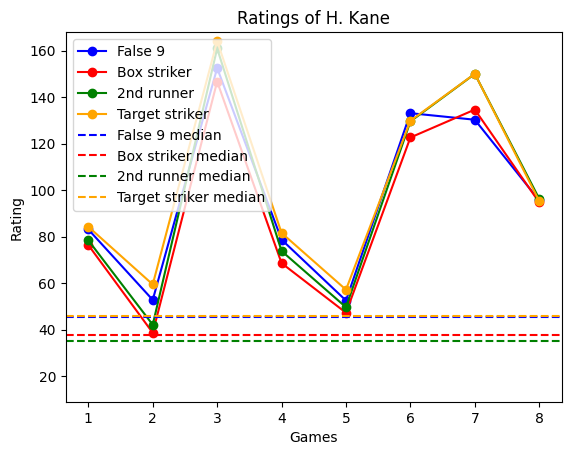

In [677]:
# Insert data
data_points1 = np.array(result['scaled_false 9'])
data_points2 = np.array(result['scaled_box'])
data_points3 = np.array(result['scaled_2nd runner'])
data_points4 = np.array(result['scaled_target'])
print(data_points1.mean())
print(data_points2.mean())
print(data_points3.mean())
print(data_points4.mean())

# Generate x-axis values (game numbers)
games = range(1, len(data_points1) + 1)

# Plot the data points for each vector with different colors and connect them
plt.plot(games, data_points1, marker='o', linestyle='-', color='blue', label='False 9')
plt.plot(games, data_points2, marker='o', linestyle='-', color='red', label='Box striker')
plt.plot(games, data_points3, marker='o', linestyle='-', color='green', label='2nd runner')
plt.plot(games, data_points4, marker='o', linestyle='-', color='orange', label='Target striker')

#plt.ylim(min_val - 5, max_val + 5)
plt.ylim(9, 168)


# Plot horizontal lines at the median value for each vector
plt.axhline(mean1, color='blue', linestyle='--', label='False 9 median')
plt.axhline(mean2, color='red', linestyle='--', label='Box striker median')
plt.axhline(mean3, color='green', linestyle='--', label='2nd runner median')
plt.axhline(mean4, color='orange', linestyle='--', label='Target striker median')

# Add labels and title
plt.xlabel('Games')
plt.ylabel('Rating')
plt.title('Ratings of H. Kane')
plt.legend()

plt.savefig('testrating.png')
# Display the plot
plt.show()

Mean of the players:

Kane: 2020
97.34081800268976
91.21543835421704
97.61143125581353
102.74178019077303

Amdouni: 2024
75.347568390527
73.92526397991699
78.1567103539439
82.29751354202332

Weghorst: 2024
54.821109995390984
51.380067661840414
50.55266859637615
57.57547908520444

Vargas: 2024
63.548815445427934
61.67530964712833
62.71731072199411

Hazard: 2020
100.98769637311419
105.6908681480319
99.83843192604121

Shaqiri: 2024
50.88110682587556
52.02118517923609
47.64124566536354

Cancelo: 2024
81.99502079633629
78.05983888365992
73.21949271778263

R. Rodriguez: 2024
59.313803555850164
59.19696525758228
57.00343415726151

T. Hernandez: 2024
66.55272729014959
63.940912003645394
64.37152607814465

Kjaer: 2024
59.58026054281056
54.173939108116706
59.116465580601314

Akanji: 2024
62.46047343903909
65.32449305540102
62.03500276566442

van Dijk: 2024
65.83591516747092
65.04448703935815
67.66942120704144

KDB: 2020
100.03887423620988
81.22339862308469
88.14725158573619
84.29957025436019

Xhaka: 2024
71.33708263285979
80.06782782501605
81.0838199590465
79.45150212051638

Palhinha: 2024
35.50018095272874
48.87982544809992
56.38107481409151
61.14523038979936


Fullback:
47.0002613949184
47.03648117129725
49.296588398676505

Striker:
45.39109071225893
37.78920794245907
35.31285226725771
46.088355080899454

Winger:
31.562222560092252
34.07207700905238
31.19075417435473

CB:
50.07056540209073
51.283789227858776
50.59904178197779

Midfield: 
35.924372505067026
43.0052414146306
42.37123609048897
45.450233479160254